In [69]:
# Import basic required modules
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

plt.style.use('bmh')
sns.set_style({'axes.grid':False})


In [70]:
train = pd.read_csv('/content/sample_data/deliverytimeprediction_train.csv')
test = pd.read_csv('/content/sample_data/deliverytimeprediction_test.csv')


In [71]:
train

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter,Delivery_Time_min
0,1.88,24,7.0,False,False,False,False,False,True,False,True,False,False,True,35
1,0.86,21,7.0,False,False,False,False,False,True,False,False,False,True,False,28
2,8.37,13,7.0,False,False,False,False,False,False,True,False,False,False,True,42
3,8.53,8,2.0,False,False,False,False,True,False,True,False,False,False,True,41
4,16.38,7,5.0,False,True,False,False,False,True,False,False,True,False,False,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,6.07,18,4.0,False,False,False,False,True,False,False,False,False,False,False,35
696,5.14,23,7.0,False,False,False,False,False,True,True,False,False,False,True,43
697,7.17,15,7.0,False,False,False,False,True,False,False,False,False,False,False,32
698,3.90,25,9.0,False,True,False,False,False,False,False,True,False,True,False,54


In [72]:
test

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter,Delivery_Time_min
0,9.64,14,6.0,False,True,False,False,False,True,True,False,False,False,False,52
1,7.64,10,8.0,False,False,False,True,True,False,False,False,False,True,False,31
2,6.00,20,8.0,False,False,True,False,True,False,False,True,False,True,False,53
3,16.23,6,0.0,False,False,False,False,False,True,True,False,False,False,False,54
4,15.81,25,1.0,False,False,False,False,True,False,False,True,False,True,False,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,12.08,16,4.0,False,False,False,False,False,False,False,False,False,False,True,60
296,17.99,15,3.0,False,False,True,False,True,False,False,False,False,False,False,63
297,11.75,9,2.0,False,False,False,False,False,False,False,True,False,False,False,55
298,2.76,8,5.0,False,False,False,True,False,True,False,True,False,False,True,22


In [73]:
for i in range(3, 14):
  train[train.iloc[:, i].name] = train.iloc[:, i].map({True: 1, False: 0})
  test[train.iloc[:, i].name] = test.iloc[:, i].map({True: 1, False: 0})


In [74]:
train

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter,Delivery_Time_min
0,1.88,24,7.0,0,0,0,0,0,1,0,1,0,0,1,35
1,0.86,21,7.0,0,0,0,0,0,1,0,0,0,1,0,28
2,8.37,13,7.0,0,0,0,0,0,0,1,0,0,0,1,42
3,8.53,8,2.0,0,0,0,0,1,0,1,0,0,0,1,41
4,16.38,7,5.0,0,1,0,0,0,1,0,0,1,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,6.07,18,4.0,0,0,0,0,1,0,0,0,0,0,0,35
696,5.14,23,7.0,0,0,0,0,0,1,1,0,0,0,1,43
697,7.17,15,7.0,0,0,0,0,1,0,0,0,0,0,0,32
698,3.90,25,9.0,0,1,0,0,0,0,0,1,0,1,0,54


<ipython-input-75-97070357c3b7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Delivery_Time_min, bins = 200, color = 'firebrick', ax = ax)


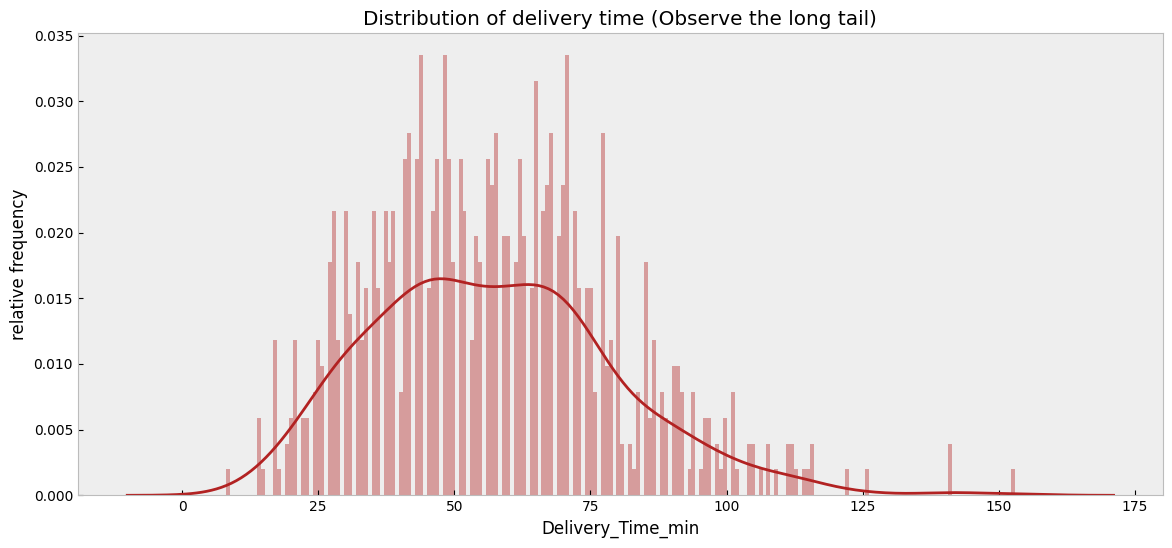

In [75]:
# distribution of delivery time
fig, ax = plt.subplots(figsize = (14,6))
sns.distplot(train.Delivery_Time_min, bins = 200, color = 'firebrick', ax = ax)
ax.set_title('Distribution of delivery time (Observe the long tail)')
ax.set_ylabel('relative frequency')
plt.show()

<ipython-input-76-54317ab83236>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Distance_km, bins = 200, color = 'firebrick', ax = ax)


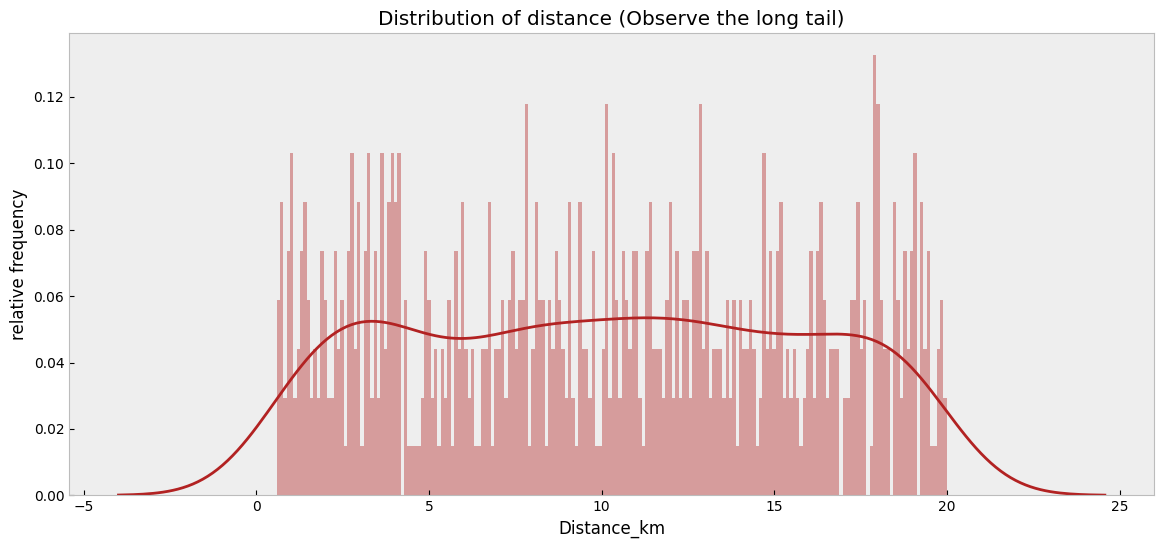

In [76]:
# distribution of distance
fig, ax = plt.subplots(figsize = (14,6))
sns.distplot(train.Distance_km, bins = 200, color = 'firebrick', ax = ax)
ax.set_title('Distribution of distance (Observe the long tail)')
ax.set_ylabel('relative frequency')
plt.show()

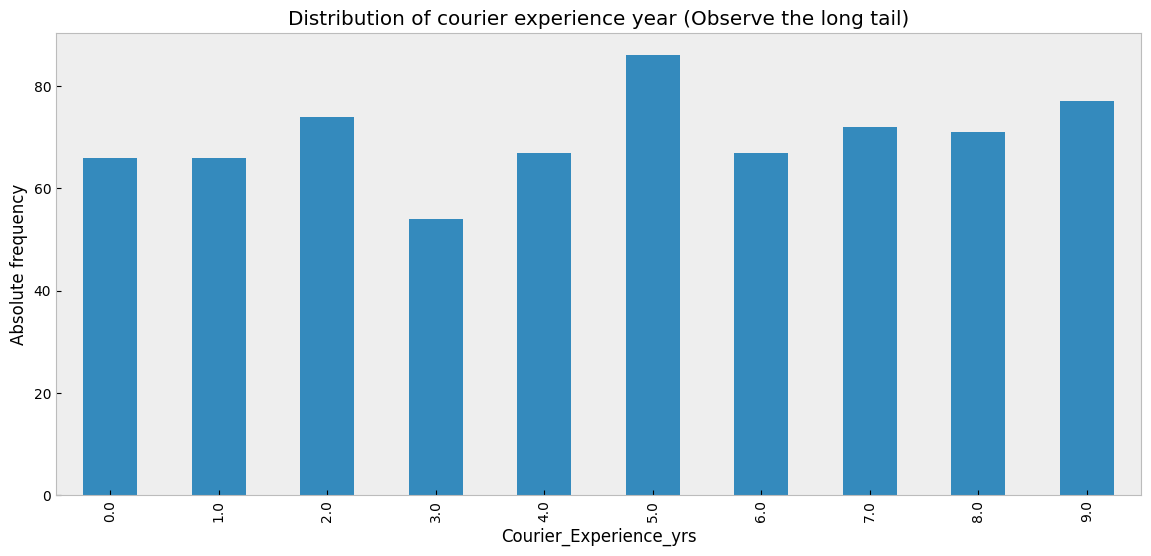

In [77]:
# distribution of courier experience year
fig, ax = plt.subplots(figsize = (14,6))
class_dist = train.Courier_Experience_yrs.value_counts()
class_dist = class_dist.sort_index()
class_dist.plot(kind = 'bar', ax = ax)
ax.set_title('Distribution of courier experience year (Observe the long tail)')
ax.set_ylabel('Absolute frequency')
plt.show()

In [78]:
x_train = train.drop(['Delivery_Time_min'], axis=1)
y_train = train.Delivery_Time_min
x_test = test.drop(['Delivery_Time_min'], axis=1)
y_test = test.Delivery_Time_min

Linear Regression

RMSE of linear regression model with all features: 9.06


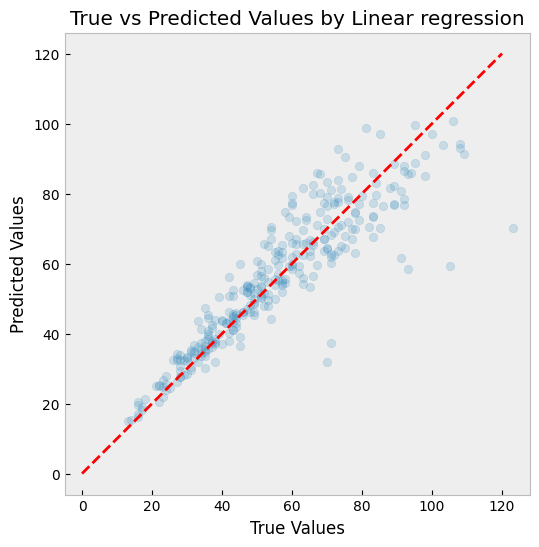

In [79]:
def train_and_predict(x_train, y_train, x_test, feat=None):
  if feat:
    x_train = x_train[feat]
    x_test = x_test[feat]

  linear_reg = LinearRegression()
  linear_reg.fit(x_train, y_train)

  y_pred = linear_reg.predict(x_test)

  return y_pred

# regression model
y_pred = train_and_predict(x_train, y_train, x_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print('RMSE of linear regression model with all features: \
{:0.2f}'.format(rmse))

# Plotting the predicted values against the true values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.title('True vs Predicted Values by Linear regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Set the same boundaries for x and y axes

plt.xlim(0, 120)
plt.ylim(0, 120)


# Plot a 45-degree line
plt.plot([0, 120], [0, 120], color='red', linestyle='--', linewidth=2)

plt.axis('equal')  # Ensure aspect ratio is equal
plt.show()

Hat Matrix

In [80]:
# compute Hat Matrix: H = X (X^T X)^(-1) X^T
x = x_train.to_numpy()
intercept = np.ones((x.shape[0], 1))
X = np.column_stack((intercept, x)).astype(float)
print(X)
# X
H = X @ np.linalg.pinv(X.T @ X) @ X.T


[[ 1.    1.88 24.   ...  0.    0.    1.  ]
 [ 1.    0.86 21.   ...  0.    1.    0.  ]
 [ 1.    8.37 13.   ...  0.    0.    1.  ]
 ...
 [ 1.    7.17 15.   ...  0.    0.    0.  ]
 [ 1.    3.9  25.   ...  0.    1.    0.  ]
 [ 1.    4.05 19.   ...  0.    0.    1.  ]]


In [81]:
# store diagonal
diagonal = np.diagonal(H)


# get predicted y train
y_pred_hat_train = H @ y_train

residuals = np.abs(y_pred_hat_train-y_train)



In [82]:
index_high_res = np.where(residuals > np.percentile(residuals, 95)) # get index of high residual
index_high_dia = np.where(diagonal > np.percentile(diagonal, 95)) # get index of high diagonal

index_low_res = np.where(residuals < np.percentile(residuals, 5)) # get index of low residual
index_low_dia = np.where(diagonal < np.percentile(diagonal, 5)) # get index of low diagonal


index_highRes_highDia = np.intersect1d(index_high_res, index_high_dia) # index of high res and high dia
print(f'high residual high diagonal: {index_highRes_highDia}')
index_highRes_lowDia = np.intersect1d(index_high_res, index_low_dia) # index of high res and low dia
print(f'high residual low diagonal: {index_highRes_lowDia}')
index_lowRes_highDia = np.intersect1d(index_low_res, index_high_dia) # index of low res and high dia
print(f'low residual high diagonal: {index_lowRes_highDia}')
index_lowRes_lowDia = np.intersect1d(index_low_res, index_low_dia) # index of low res and low dia
print(f'low residual low diagonal: {index_lowRes_lowDia}')


special_data_points = np.hstack((index_highRes_highDia, index_highRes_lowDia, index_lowRes_highDia, index_lowRes_lowDia))
x_train_features = x_train.iloc[:, :3].to_numpy()


high residual high diagonal: [251]
high residual low diagonal: [418]
low residual high diagonal: [10]
low residual low diagonal: []


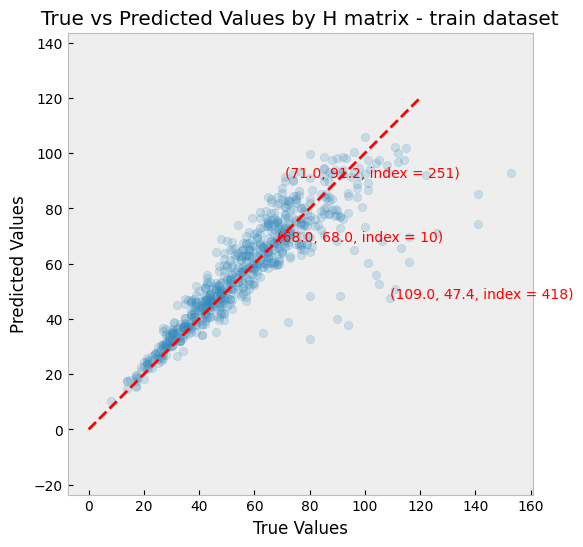

In [83]:
# Plotting the predicted values against the true values
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred_hat_train, alpha=0.2)
plt.title('True vs Predicted Values by H matrix - train dataset')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Set the same boundaries for x and y axes

plt.xlim(0, 120)
plt.ylim(0, 120)

for i in special_data_points:
    plt.annotate(f'({y_train[i]:.1f}, {y_pred_hat_train[i]:.1f}, index = {i})', (y_train[i], y_pred_hat_train[i]), color='red')

# Plot a 45-degree line
plt.plot([0, 120], [0, 120], color='red', linestyle='--', linewidth=2)

plt.axis('equal')  # Ensure aspect ratio is equal
plt.show()

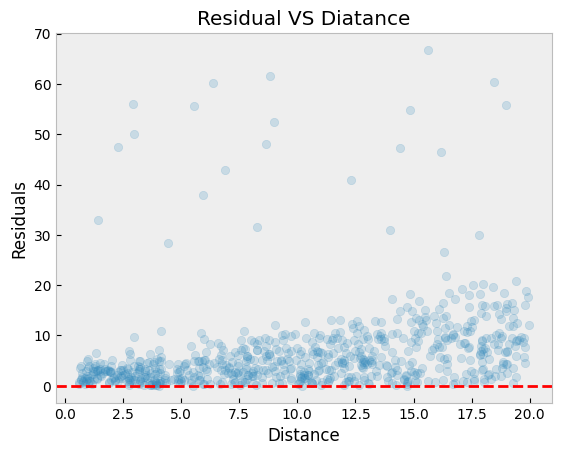

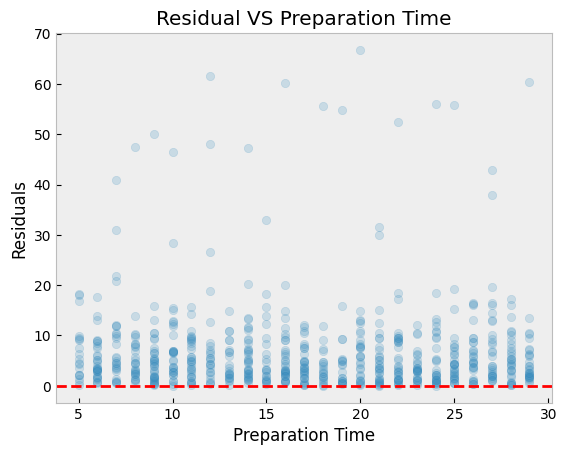

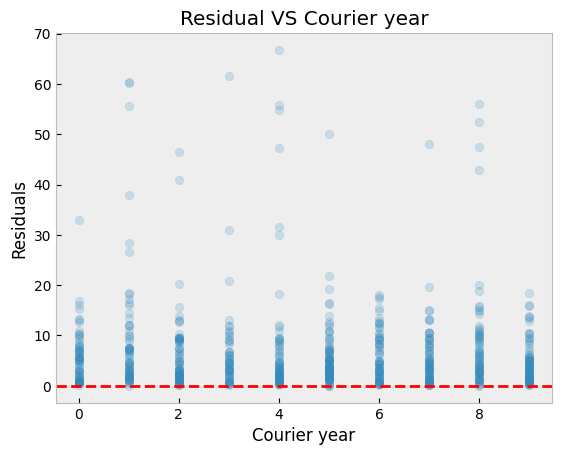

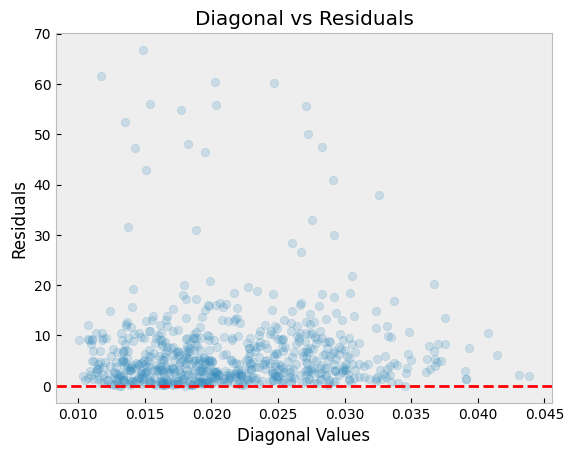

In [84]:
# distance feature
plt.scatter(x_train.iloc[:, 0], residuals, alpha=0.2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Distance')
plt.ylabel('Residuals')
plt.title('Residual VS Diatance')
plt.show()

# preparation time
plt.scatter(x_train.iloc[:, 1], residuals, alpha=0.2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Preparation Time')
plt.ylabel('Residuals')
plt.title('Residual VS Preparation Time')
plt.show()

# courier year
plt.scatter(x_train.iloc[:, 2], residuals, alpha=0.2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Courier year')
plt.ylabel('Residuals')
plt.title('Residual VS Courier year')
plt.show()

# residuals vs diagonal
plt.scatter(diagonal, residuals, alpha=0.2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Diagonal Values')
plt.ylabel('Residuals')
plt.title('Diagonal vs Residuals')
plt.show()

In [85]:
# compute beta
XTX_inv = np.linalg.pinv(X.T @ X)  # compute (X.T @ X) 的逆
beta = XTX_inv @ X.T @ y_train  # compute beta

print("beta:")
print(beta)

beta:
[ 18.35676437   2.97700885   0.95874296  -0.69645235   7.54261111
   5.07702967   9.92531538   1.88100001 -12.53569248  -6.96267924
   1.44575555   0.38415138  -0.29967203   0.29470035  -1.11695789]


RMSE of linear regression model with all features: 9.06


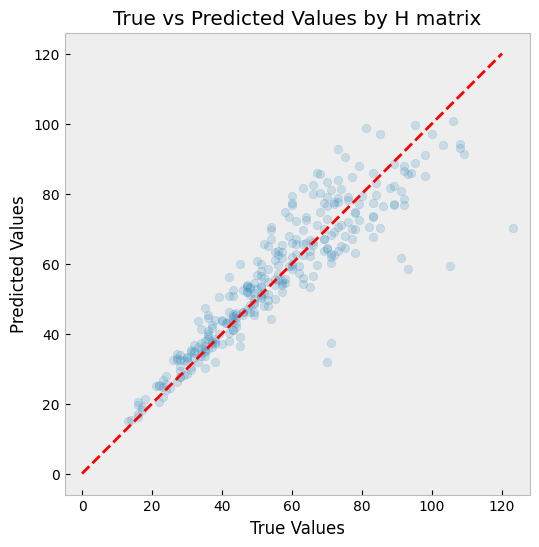

In [86]:
# compute y_pred by beta
x_test_hat = x_test.to_numpy()
intercept_hat = np.ones((x_test_hat.shape[0], 1))
X_hat = np.column_stack((intercept_hat, x_test_hat))

# y_hat_pred
y_hat_pred = X_hat @ beta

# compute rmse
rmse_hat = sqrt(mean_squared_error(y_test, y_hat_pred))
print('RMSE of linear regression model with all features: \
{:0.2f}'.format(rmse))


# Plotting the predicted values against the true values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_hat_pred, alpha=0.2)
plt.title('True vs Predicted Values by H matrix')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Set the same boundaries for x and y axes

plt.xlim(0, 120)
plt.ylim(0, 120)


# Plot a 45-degree line
plt.plot([0, 120], [0, 120], color='red', linestyle='--', linewidth=2)

plt.axis('equal')  # Ensure aspect ratio is equal
plt.show()

Successive Orthogonalization

Coefficient for Distance_km: 5.03634509551967; RMSE: 18.0732
Coefficient for Preparation_Time_min: 1.293294559124026; RMSE: 10.6032
Coefficient for Courier_Experience_yrs: -0.04093710846649504; RMSE: 10.6107
Coefficient for Weather_Foggy: 6.292448259001453; RMSE: 10.4609
Coefficient for Weather_Rainy: 4.7851839542657535; RMSE: 10.4530
Coefficient for Weather_Snowy: 9.620019673138215; RMSE: 10.0916
Coefficient for Weather_Windy: 5.049362925259248; RMSE: 10.0715
Coefficient for Traffic_Level_Low: -6.264791075408579; RMSE: 9.5599
Coefficient for Traffic_Level_Medium: -1.5292500455381188; RMSE: 9.6076
Coefficient for Time_of_Day_Evening: 2.6785373608445893; RMSE: 9.6366
Coefficient for Time_of_Day_Morning: 3.143119431086924; RMSE: 9.6905
Coefficient for Time_of_Day_Night: 2.9863808558528233; RMSE: 9.6931
Coefficient for Vehicle_Type_Car: 1.451442546515542; RMSE: 9.6651
Coefficient for Vehicle_Type_Scooter: 1.0142746613340239; RMSE: 9.6663


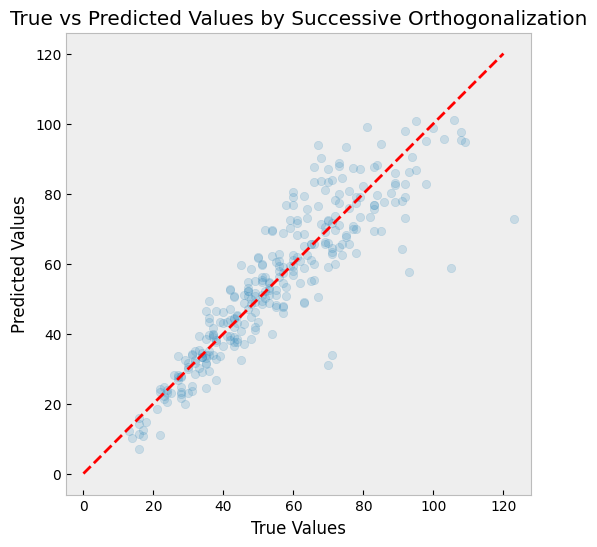

In [87]:
from sklearn.metrics import mean_squared_error

def successive_orthogonalization(X_train, y_train, X_test, y_test):
    n_samples_train, n_features = X_train.shape
    n_samples_test = X_test.shape[0]

    coefficients = {}
    rmses = {}
    residuals = y_train.copy()
    r2 = 0

    feature_names = X_train.columns
    X_train_np = X_train.values
    X_test_np = X_test.values
    y_test_np = y_test.values

    # Storage for orthogonalized features
    Z_train = np.zeros_like(X_train_np)
    Z_test = np.zeros_like(X_test_np)

    for i in range(n_features):
        feature_name = feature_names[i]
        x_i_train = X_train_np[:, i].copy()
        x_i_test = X_test_np[:, i].copy()  # Keep test feature for transformation

        # Orthogonalization
        for j in range(i):
            x_j_train = Z_train[:, j]  # Use previously orthogonalized feature
            x_j_test = Z_test[:, j]  # Use the same transformation on test data

            # Compute projection coefficient (scalar)
            proj_coeff = np.dot(x_i_train, x_j_train) / np.dot(x_j_train, x_j_train)

            # Apply projection to both train and test
            x_i_train -= proj_coeff * x_j_train
            x_i_test -= proj_coeff * x_j_test  # Correct shape alignment
        # Store orthogonalized feature
        Z_train[:, i] = x_i_train
        Z_test[:, i] = x_i_test

        # Compute regression coefficient
        coefficient = np.dot(x_i_train, residuals) / np.dot(x_i_train, x_i_train)
        residuals -= coefficient * x_i_train  # Update residuals
        coefficients[feature_name] = coefficient

        # Compute RMSE using test set predictions
        y_pred_test = np.dot(Z_test[:, :i+1], np.array(list(coefficients.values())))
        rmse = np.sqrt(mean_squared_error(y_test_np, y_pred_test))
        rmses[feature_name] = rmse
        r2 = r2_score(y_test_np, y_pred_test)

    return coefficients, rmses, y_pred_test, r2

coefficients_ort, rmses, y_pred_test, r2_oth = successive_orthogonalization(x_train, y_train, x_test, y_test)

for feature_name, coeff in coefficients_ort.items():
    print(f"Coefficient for {feature_name}: {coeff}; RMSE: {rmses[feature_name]:.4f}")

# Plotting the predicted values against the true values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, alpha=0.2)
plt.title('True vs Predicted Values by Successive Orthogonalization')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Set the same boundaries for x and y axes

plt.xlim(0, 120)
plt.ylim(0, 120)


# Plot a 45-degree line
plt.plot([0, 120], [0, 120], color='red', linestyle='--', linewidth=2)

plt.axis('equal')  # Ensure aspect ratio is equal
plt.show()

Ridge Regression

Best alpha (regularization parameter): 1.0
RMSE of Ridge regression: 9.047405032604958
Ridge Regression Coefficients: [  2.97815268   0.95844769  -0.69586146   7.37340054   4.98293352
   9.70194707   1.80062417 -12.35004145  -6.81514344   1.42806004
   0.36854856  -0.28912551   0.2946035   -1.11786462]


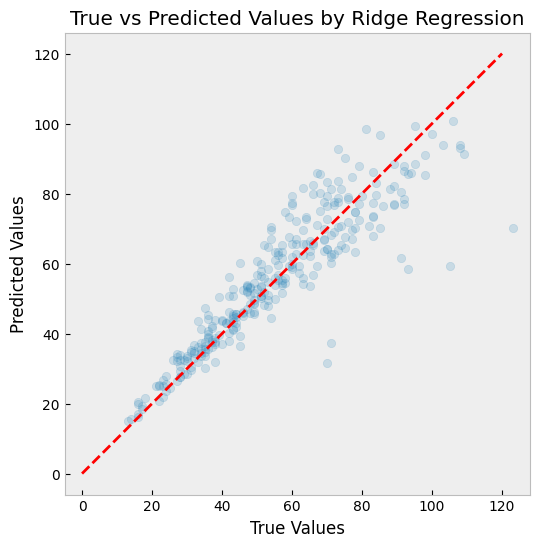

In [88]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import KFold
from math import sqrt

# Define the RidgeCV model with cross-validation
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=KFold(n_splits=5, shuffle=True, random_state=42))

# Fit the model to the training data
ridge_cv.fit(x_train, y_train)

# Get the best alpha (regularization parameter)
best_alpha = ridge_cv.alpha_
print(f"Best alpha (regularization parameter): {best_alpha}")

# Fit the Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha, random_state=42)
ridge_best.fit(x_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_best.predict(x_test)

# Evaluate the model
rmse_ridge = sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"RMSE of Ridge regression: {rmse_ridge}")

r2_ridge = r2_score(y_test, y_pred_ridge)
# You can further analyze coefficients if needed
coefficients_ridge = ridge_best.coef_
print("Ridge Regression Coefficients:", coefficients_ridge)


# Plotting the predicted values against the true values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.2)
plt.title('True vs Predicted Values by Ridge Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Set the same boundaries for x and y axes

plt.xlim(0, 120)
plt.ylim(0, 120)


# Plot a 45-degree line
plt.plot([0, 120], [0, 120], color='red', linestyle='--', linewidth=2)

plt.axis('equal')  # Ensure aspect ratio is equal
plt.show()

Lasso

Best alpha (regularization parameter): 0.09707290640816325
RMSE of Lasso regression: 9.007379160444644
Eliminated Features:
['Time_of_Day_Morning', 'Time_of_Day_Night', 'Vehicle_Type_Car']
Retained Features:
['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy', 'Weather_Windy', 'Traffic_Level_Low', 'Traffic_Level_Medium', 'Time_of_Day_Evening', 'Vehicle_Type_Scooter']
Coefficients:
[  2.98361997   0.9548837   -0.6836909    5.81413571   3.91186835
   8.1396337    0.18129164 -11.30554438  -5.89298177   0.75714223
   0.          -0.           0.          -0.83988408]


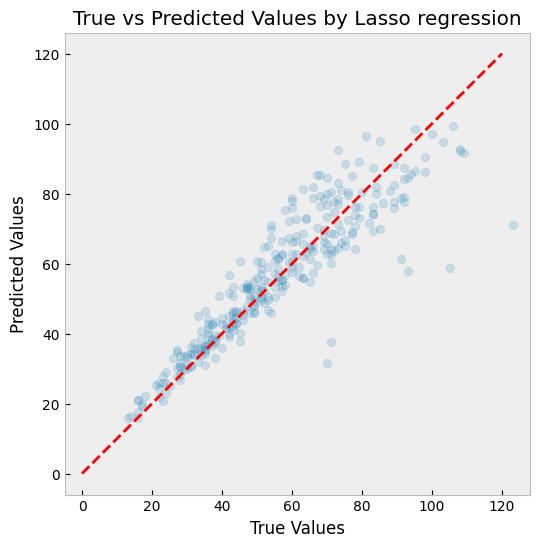

In [89]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import KFold

# Define the LassoCV model with cross-validation
lasso_cv = LassoCV(cv=KFold(n_splits=5, shuffle=True, random_state=42), random_state=42)  # 5-fold cross-validation

# Fit the model to the training data
lasso_cv.fit(x_train, y_train)

# Get the best alpha (regularization parameter)
best_alpha = lasso_cv.alpha_
print(f"Best alpha (regularization parameter): {best_alpha}")

# Fit the Lasso model with the best alpha
lasso_best = Lasso(alpha=best_alpha, random_state=42)
lasso_best.fit(x_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_best.predict(x_test)

# Evaluate the model
rmse_lasso = sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"RMSE of Lasso regression: {rmse_lasso}")

r2_lasso = r2_score(y_test, y_pred_lasso)

# Identify which features are eliminated (coefficients close to zero)
feature_names = x_train.columns
coefficients_lasso = lasso_best.coef_

eliminated_features = []
retained_features = []
for feature, coef in zip(feature_names, coefficients_lasso):
  if abs(coef) < 1e-4:  # Consider coefficients close to zero as eliminated
    eliminated_features.append(feature)
  else:
    retained_features.append(feature)

print("Eliminated Features:")
print(eliminated_features)
print("Retained Features:")
print(retained_features)
print("Coefficients:")
print(coefficients_lasso)

# Plotting the predicted values against the true values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.2)
plt.title('True vs Predicted Values by Lasso regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Set the same boundaries for x and y axes

plt.xlim(0, 120)
plt.ylim(0, 120)


# Plot a 45-degree line
plt.plot([0, 120], [0, 120], color='red', linestyle='--', linewidth=2)

plt.axis('equal')  # Ensure aspect ratio is equal
plt.show()

In [90]:
coefficients_ridge-coefficients_lasso

array([-0.00546728,  0.00356399, -0.01217056,  1.55926483,  1.07106517,
        1.56231338,  1.61933253, -1.04449708, -0.92216167,  0.67091781,
        0.36854856, -0.28912551,  0.2946035 , -0.27798054])

In [91]:
coefficients_ridge-coefficients_ort[feature_name]

array([  1.96387802,  -0.05582697,  -1.71013612,   6.35912588,
         3.96865886,   8.68767241,   0.78634951, -13.36431612,
        -7.8294181 ,   0.41378537,  -0.6457261 ,  -1.30340017,
        -0.71967116,  -2.13213928])

In [93]:
# mean squared error
mse_lasso = rmse_lasso ** 2
mse_ridge = rmse_ridge ** 2


print(f"MSE of Successive Orthogonalization Mode: {rmses['Vehicle_Type_Scooter']**2:.4f}")
print(f"R2 of Successive Orthogonalization Mode:: {r2_oth:.4f}")


print(f"MSE of Lasso Model: {mse_lasso:.4f}")
print(f"R2 of Lasso Model: {r2_lasso:.4f}")


print(f"MSE of Ridge Model: {mse_ridge:.4f}")
print(f"R2 of Ridge Model: {r2_ridge:.4f}")

MSE of Successive Orthogonalization Mode: 93.4374
R2 of Successive Orthogonalization Mode:: 0.7955
MSE of Lasso Model: 81.1329
R2 of Lasso Model: 0.8225
MSE of Ridge Model: 81.8555
R2 of Ridge Model: 0.8209
